In [ ]:
from keras.datasets import mnist

In [ ]:
#load MNIST dataset
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)

(60000, 28, 28)


In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
from matplotlib import pyplot as plt

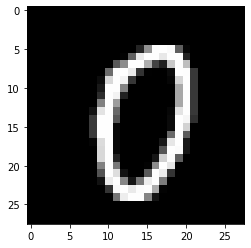

In [ ]:
plt.imshow(x_train[1000])
plt.gray()
plt.show()

# Model Architecture

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as k

In [ ]:
k.set_image_data_format('channels_last')

In [ ]:
# set image information
channels=1
height=28
width=28

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
train_data=x_train.reshape(x_train.shape[0],height,width,channels)

In [ ]:
train_data.shape

(60000, 28, 28, 1)

In [ ]:
test_data=x_test.reshape(x_test.shape[0],height,width,channels)

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train.max()

255

In [ ]:
# scale the data
train_data=train_data/255
test_data=test_data/255

In [ ]:
train_data.max()

1.0

In [ ]:
# one hot encoding outcome
train_target=to_categorical(y_train)
test_target=to_categorical(y_test)

In [ ]:
#number of classes
number_of_classes=test_target.shape[1]

In [ ]:
#model building
model=Sequential()
model.add(Conv2D(filters=64,kernel_size=(5,5),input_shape=(width,height,channels),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(number_of_classes,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 32)          51232     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 128)               6

In [ ]:
#compile the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 7.2 MB/s 


In [ ]:
from livelossplot import PlotLossesKerasTF

In [ ]:
type(train_data)

numpy.ndarray

In [ ]:
train_data.shape

(60000, 28, 28, 1)

In [ ]:
train_target.shape

(60000, 10)

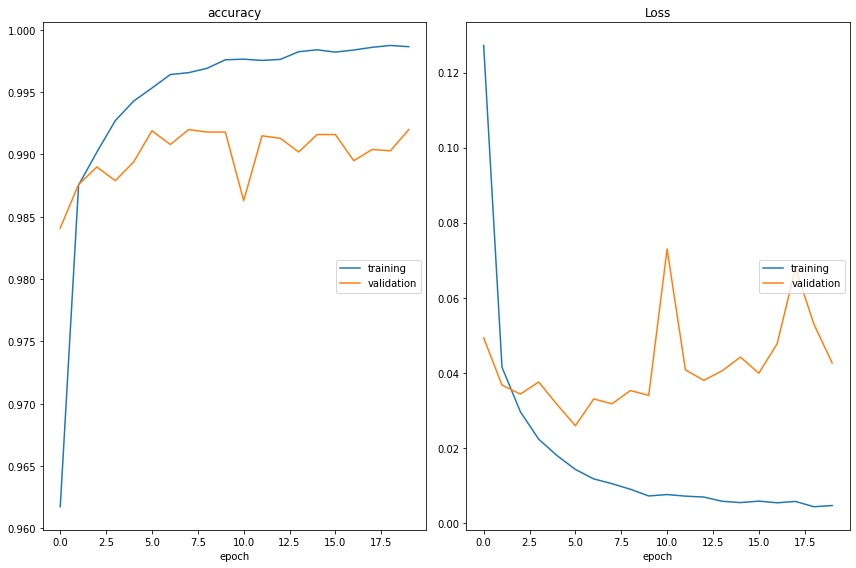

accuracy
	training         	 (min:    0.962, max:    0.999, cur:    0.999)
	validation       	 (min:    0.984, max:    0.992, cur:    0.992)
Loss
	training         	 (min:    0.004, max:    0.127, cur:    0.005)
	validation       	 (min:    0.026, max:    0.073, cur:    0.043)
1875/1875 [==============================] - 104s 55ms/step - loss: 0.0047 - accuracy: 0.9987 - val_loss: 0.0426 - val_accuracy: 0.9920


In [ ]:
# train the model
res=model.fit(train_data,train_target,epochs=20,validation_data=(test_data,test_target),callbacks=[PlotLossesKerasTF()])

#test

In [ ]:
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model

In [ ]:
input_img=Input(shape=(784,))
encoded=Dense(128,activation="relu")(input_img)
encoded=Dense(64,activation='relu')(encoded)
encoded=Dense(32,activation='relu')(encoded)
decoded=Dense(64,activation="relu")(encoded)
decoded=Dense(128,activation="relu")(decoded)
decoded=Dense(784,activation="sigmoid")(decoded)

In [ ]:
#build autoencoder
autoencoder=Model(input_img,decoded)
encoder=Model(input_img,encoded)

In [ ]:
#compile model
autoencoder.compile(optimizer='adam',loss='mse')

In [ ]:
import numpy as np

In [ ]:
x_train=x_train.reshape((x_train.shape[0],np.prod(x_train.shape[1:])))

x_test=x_test.reshape((x_test.shape[0],np.prod(x_test.shape[1:])))

In [ ]:
autoencoder.fit(x_train,x_train,epochs=50,batch_size=100,validation_data=(x_test,x_test),callbacks=[PlotLossesKerasTF()])

Epoch 1/50


ValueError: ignored